In [ ]:
!pip install talib-binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 27.9 MB/s 


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from sklearn import svm,metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import talib as ta
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,
 mean_absolute_percentage_error,average_precision_score,roc_auc_score
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# #Prepair Data
# dfo = pd.read_csv ('SET 50 Historical Data.csv')
# df = pd.DataFrame([price for price in dfo['Price']], columns = ['price'])
# df = df.iloc[::-1]
# df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
# df['EMA10']= ta.EMA(df['price'],10)


In [ ]:
dfo = pd.read_csv ('CPALL.BK.csv')
df = pd.DataFrame([price for price in dfo['Adj Close']], columns = ['price'])

df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

ema_day = 21
predictday = 14
df['Forecast prices']= df['price'].shift(-predictday)
df['EMA10']= ta.EMA(df['price'],10)
df['EMA21']= ta.EMA(df['price'],ema_day)
df['RSI'] = ta.RSI(df['price'], 14)

df=df.iloc[ema_day-1:]
df=df.iloc[:-predictday]
#_______________________
X = df.drop(columns=['Forecast prices'],axis=1)

Y = df['Forecast prices']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

test_predict = model.predict(X_test)

test_predict=np.array(test_predict)
print("Model Coefficients:", model.coef_)
print("Coefficient of Determination:", r2_score(y_test, test_predict))
print("Mean Absolute Error:", mean_absolute_error(y_test, test_predict))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test,test_predict))
print("Mean Squared Error:", mean_squared_error(y_test, test_predict))
print("Root Mean Squared Error:",math.sqrt(mean_squared_error(y_test, test_predict)))

Model Coefficients: [ 0.32102936  0.80206683 -0.23341638  0.07058352]
Coefficient of Determination: -0.25328501053884733
Mean Absolute Error: 2.499649452682632
Mean Absolute Percentage Error: 0.04113732642067465
Mean Squared Error: 11.428223011209628
Root Mean Squared Error: 3.3805654868985497


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


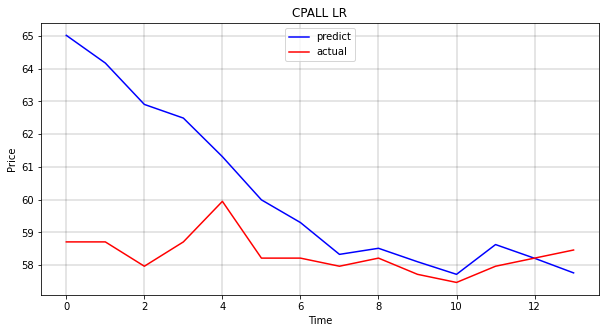

Coefficient of Determination: -24.052021241602162
Mean Absolute Error: 1.9562968724502139
Mean Absolute Percentage Error: 0.0334326549983561
Mean Squared Error: 8.282050913382749
Root Mean Squared Error: 2.877855262757797
Accuracy 71.42857142857143 %


In [ ]:
xf = X.tail(predictday)

xf = np.array(xf)

xf
dfoo = dfo
#dfoo = dfo.iloc[::-1]
p = dfoo['Adj Close'].tail(predictday)
p = np.array(p).astype(float)
test_predict = model.predict(xf)
#print(p)
plt.plot(test_predict,'b',label="predict")
plt.plot(p,'r',label="actual")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(color='black', linestyle='-', linewidth=0.2)
leg = plt.legend(loc='upper center')

plt.title("CPALL LR")
plt.show()
print("Coefficient of Determination:", r2_score(p, test_predict))
print("Mean Absolute Error:", mean_absolute_error(p, test_predict))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(p,test_predict))
print("Mean Squared Error:", mean_squared_error(p, test_predict))
print("Root Mean Squared Error:",math.sqrt(mean_squared_error(p, test_predict)))

y_test2 = np.array(p).reshape(-1,1)
count = 0
for i in range (len(y_test2)):
  if (y_test2[i]-y_test2[i-1]>0)==(test_predict[i]-test_predict[i-1]>0)or(y_test2[i]-y_test2[i-1]>0)==(test_predict[i]-test_predict[i-1]>0):
    count = count+1
Acc =  (count*100)/(len(test_predict))
print('Accuracy',Acc,'%')

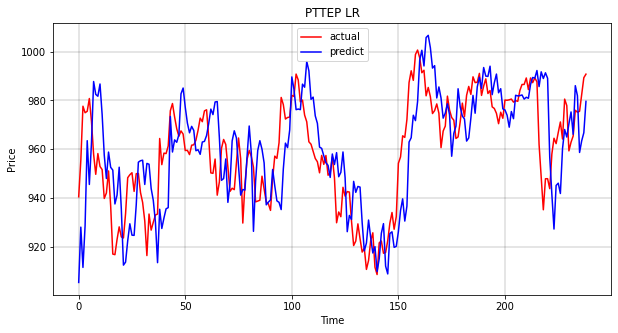

In [ ]:

plt.plot(y_test,'r',label="actual")
plt.grid(color='black', linestyle='-', linewidth=0.2)
plt.rcParams["figure.figsize"] = [10,5]
plt.plot(test_predict,'b',label="predict")
plt.xlabel("Time")
plt.ylabel("Price")

leg = plt.legend(loc='upper center')
plt.title("PTTEP LR")
plt.show()

In [ ]:
y_test2 = np.array(y_test).reshape(-1,1)
count = 0
for i in range (len(y_test2)):
  if (y_test2[i]-y_test2[i-1]>0)==(test_predict[i]-test_predict[i-1]>0)or(y_test2[i]-y_test2[i-1]>0)==(test_predict[i]-test_predict[i-1]>0):
    count = count+1
Acc =  (count*100)/(len(test_predict)-1)
print('Accuracy',Acc,'%')
    


Accuracy 56.72268907563025 %


In [ ]:
df

,price,lagg,EMA10,EMA21,RSI
1196,984.71,985.93,986.519550,982.720476,50.018229
1195,982.41,983.41,985.772359,982.692251,47.979388
1194,990.97,975.54,986.717385,983.444774,55.284745
1193,996.40,974.53,988.477860,984.622522,59.198987
1192,991.30,980.14,988.990977,985.229565,54.383766
...,...,...,...,...,...
24,989.19,975.13,985.861106,983.454479,58.733232
23,987.60,975.51,986.177269,983.831344,56.409570
22,961.93,982.48,981.768674,981.840313,33.420687
21,948.28,989.30,975.679824,978.789376,27.096913


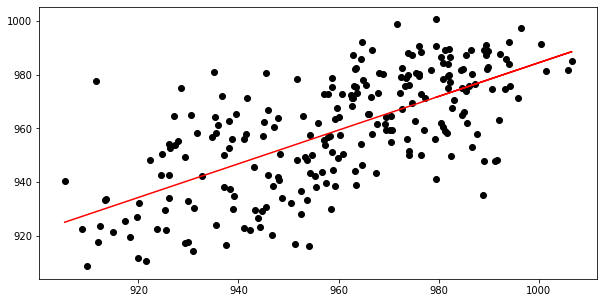

In [ ]:
plt.scatter(test_predict, y_test, color="black")
#lt.plot(X_train['EMA10'], y_train, color="blue", linewidth=3)

m, b = np.polyfit(test_predict, y_test, 1)
plt.plot(test_predict, m*test_predict+b, color='red')
plt.show()

In [ ]:
test_predict.size

235

In [ ]:
test_predict.reshape(-1,1)

array([[ 94.15765298],
       [ 93.26652124],
       [ 93.43442315],
       [ 94.00882997],
       [ 93.59822649],
       [ 92.08715522],
       [ 87.77139872],
       [ 89.3364391 ],
       [ 87.38076024],
       [ 87.96518914],
       [ 88.75796465],
       [ 87.39084071],
       [ 90.04856075],
       [ 90.51271552],
       [ 90.97962883],
       [ 92.13655104],
       [ 95.96813308],
       [ 95.41969912],
       [ 95.85054101],
       [ 94.79485315],
       [ 97.75202314],
       [101.89800035],
       [102.28224735],
       [100.24765272],
       [100.37095766],
       [102.03024241],
       [101.6180899 ],
       [101.7690635 ],
       [100.79327598],
       [ 99.84226349],
       [101.28658382],
       [ 99.24134546],
       [ 97.33908286],
       [ 93.32354902],
       [ 96.2334653 ],
       [ 96.76647113],
       [ 97.2821734 ],
       [ 98.67586342],
       [ 98.70592368],
       [ 99.19691528],
       [100.58711836],
       [100.60966698],
       [101.10394448],
       [104

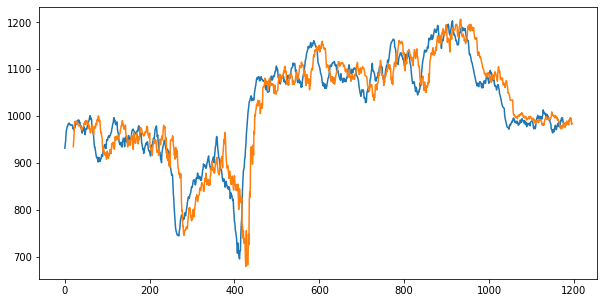

In [ ]:
#Prepair Data
df2 = pd.read_csv ('SET 50 Historical Data-2.csv')
df2 = pd.DataFrame([price for price in df2['Price']], columns = ['price'])
df2 = df.iloc[::-1]
df2['price'] = df2['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df2['EMA10']= ta.EMA(df['price'],10)

ema_day = 21
#df['return'] = df['price'].pct_change()
df2['EMA10']= ta.EMA(df2['price'],10)
df2['EMA21']= ta.EMA(df2['price'],ema_day)
df2['RSI'] = ta.RSI(df2['price'], 14)

df2=df2.iloc[ema_day-1:]



ippred =df2.drop(columns=['price'],axis=1)
test_predict2 = model.predict(ippred)


y2 = df2['price']

plt.plot(test_predict2)
plt.plot(df2['price'])

In [ ]:

print("Model Coefficients:", model.coef_)
print("Coefficient of Determination:", r2_score(y2, test_predict2))
print("Mean Absolute Error:", mean_absolute_error(y2, test_predict2))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y2,test_predict2))
print("Mean Squared Error:", mean_squared_error(y2, test_predict2))
print("Root Mean Squared Error:",math.sqrt(mean_squared_error(y2, test_predict2)))

Model Coefficients: [[ 1.25365778 -0.27228379  0.79407296]]
Coefficient of Determination: 0.9898645956069135
Mean Absolute Error: 7.213139108440025
Mean Absolute Percentage Error: 0.007374733709758964
Mean Squared Error: 113.02641166686354
Root Mean Squared Error: 10.6313880404613
